# Selective Search

[original paper](http://www.huppelen.nl/publications/selectiveSearchDraft.pdf)

[tutorial](https://pyimagesearch.com/2020/06/29/opencv-selective-search-for-object-detection/)

Automatic region proposal algorithms such as Selective Search paved the way for Girshick et al.'s seminal **R-CNN paper**, which gave rise to highly accurate deep learning-based object detectors.

## Region proposals versus sliding windows and image pyramids

Image pyramids create multi-scale representation of an input image, allowing us to detect objects at multiple scales/sizes.

Sliding windows operate on each layer of the image pyramid, sliding from left-to-right and top-to-bottom, thereby allowing us to localize *where* in an image a given object is.

These methods are **extremely slow** and **sensitive to parameter choices**.

Region proposal algorithms aim to replace these methods while being faster, more efficient and accurate. The general idea is that a region proposal algorithm should inspect the image and attempt to find regions of an image that *likely* contain an object, passing that information to an actual classifier.

## What is Selective Search and how can it be used for object detection?

Selective Search algorithm implemented in OpenCV was first introduced by Uijlings et al. in their 2012 paper.

It works by over-segmenting an image using a [superpixel algorithm](https://pyimagesearch.com/tag/superpixel/) described in [Felzenszwalb's paper](https://cs.brown.edu/people/pfelzens/segment/).

![superpixel example](../static/img/superpixel_example.jpg)

*Selective Search uses superpixel method to find regions of an image that could contain an object.*

Selective Search merges superpixels in a hierarchical fashion based on five key similarity measures:

1. Color similarity
2. Texture similarity
3. Size similarity
4. Shape similarity/compatibility
5. Final meta-similarity measure

Description about each measure can be read in the tutorial page.

The results of Selective Search applying these hierarchical similarity measures can be seen in the following figure:

![Hierarchical similariy on selective search](../static/img/opencv_selective_search_hierarchical.webp)

*Selective Search applies hierarchical similarity measures to join regions and eventually form the final set of proposals for where objects could be present.*

On the bottom layer of the pyramid, we can see the original over-segmentation/superpixel generation from the Felzenszwalb method.

In the middle layer, we can see regions being joined together, eventually forming the final set of proposals (top).

### Final theoretical considerations

- Selective Search **does** generate regions of an image that **could** contain an object.
- However, selective Search **does not** have any knowledge of **what** is in that region.
- Selective Search is meant to **replace** the computationally expensive, highly inefficient method of exhaustively using image pyramids and sliding windows to examine locations of an image for a potential object.
- By using Selective Search, we can more efficiently examine regions of an image that **likely** contain an object **and then pass those regions on the a final classifier**.

## Selective Search with OpenCV and Python

In [1]:
import random
import time
import cv2
from matplotlib import pyplot as plt

In [2]:
def selective_search(img_path=None, method='fast'):
    """
    OpenCV's Selective Search
    Arguments:
        img_path: the path to your input image
        method: Selective Search algorithm to use (fast or quality). In most cases fast will sufice and thus is the default
    Returns:
        TODO: what it returns?
    """

    # load the input image
    image = cv2.imread(img_path)

    # initialize OpenCV's selective search implementation and set the input image
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)

    # check to see if we are using the *fast* but *less accurate* version
    # of selective search
    if method == 'fast':
        print('[INFO] using *fast* selective search')
        ss.switchToSelectiveSearchFast()  # required
    
    # otherwise we are using the *slower* but *more accurate* version
    else:
        print('[INFO] using *quality* selective search')
        ss.switchToSelectiveSearchQuality()  # required


    # run selective search on input image
    start = time.time()
    rects = ss.process()
    end = time.time()

    # show how long selective search took to run 
    # plus the total number of returned region proposals
    print('[INFO] selective search took {:.4f} seconds.'.format(end - start))
    print('[INFO] {} total region proposals'.format(len(rects)))

    # loop over the region proposals in chunks
    # so we can better visualize them
    for i in range(0, len(rects), 100):
        # clone original image so we can draw on it
        output = image.copy()

        # loop over the current subset of region proposals
        for (x, y, w, h) in rects[i:i + 100]:
            # draw the region proposal bounding box on the image
            color = [random.randint(0, 255) for j in range(0, 3)]
            cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)
        
        # show the output image
        plt.imshow(output)


[INFO] using *fast* selective search
[INFO] selective search took 72.4517 seconds.
[INFO] 6822 total region proposals


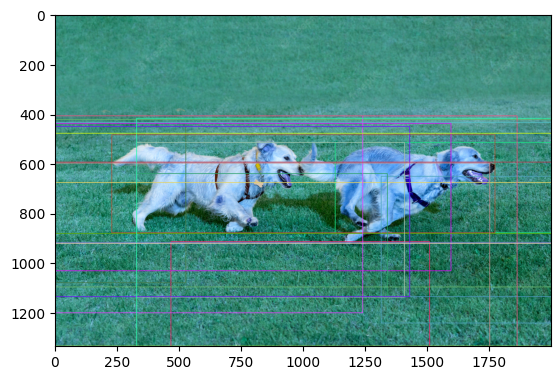

In [3]:
selective_search(img_path='../data/selective_search/dog.webp', method='fast')